In [1]:
import jax
import jax.numpy as jnp
import h5py
import matplotlib.pyplot as plt

import ase
import ase.visualize

from molnet.data.datasets import edafm
from molnet.data.utils import atom_map_generator


In [2]:
with h5py.File('/l/data/small_fragments/afm.h5') as f:
    x = f['train']['xyz'][:]

In [7]:
print(x[-1])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [3]:
generator = atom_map_generator(
    '/l/data/small_fragments/afm.h5',
    jnp.array([1, 6, 7, 8, 9]),
    2,
    2.0,
    0.125,
    0.2
)

In [4]:
for i, (x, atom_map, xyz) in enumerate(generator):

    print(x.shape, atom_map.shape)

    if i == 4:
        break

(2, 128, 128, 10) (2, 128, 128, 21)
(2, 128, 128, 10) (2, 128, 128, 21)
(2, 128, 128, 10) (2, 128, 128, 21)
(2, 128, 128, 10) (2, 128, 128, 21)
(2, 128, 128, 10) (2, 128, 128, 21)


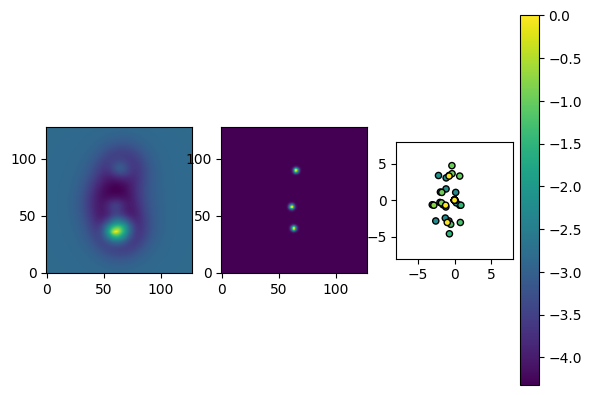

In [5]:
ax = plt.subplot(131)
ax.imshow(x[0, ..., 5], origin='lower')

ax = plt.subplot(132)
ax.imshow(atom_map[0, ..., -1], origin='lower')

ax = plt.subplot(133)
xyz_0 = xyz[0]
# sort by z
xyz_0 = xyz_0[xyz_0[:, 2].argsort()]
im = ax.scatter(xyz_0[:, 0], xyz_0[:, 1], c=xyz_0[:, 2], s=20, edgecolors='k', cmap='viridis')
plt.colorbar(im)
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')

In [8]:
print(xyz_0.shape)

(54, 5)


(54, 5)
(5, 54, 3)


/tmp/ipykernel_2106077/1557775874.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(species_matrix[:, 0], species_matrix[:, 1], s=20, edgecolors='k', cmap='viridis')


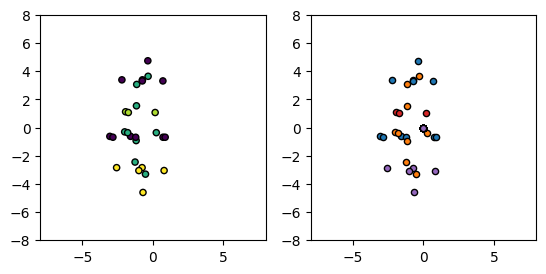

In [36]:
# split xyz_0 by last column
atomic_numbers = jnp.array([1, 6, 7, 8, 9])
print(xyz_0.shape)

def filter_by_species(sp):
    # Select rows where the atomic species matches
    return jnp.where(jnp.isin(xyz_0[:, -1], sp)[:, None], xyz_0[:, :3], jnp.zeros_like(xyz_0[:, :3]))

# Vectorize the filtering function across all species
species_matrices = jax.vmap(filter_by_species)(atomic_numbers)

print(species_matrices.shape)

ax = plt.subplot(121)

unpadded_xyz0 = xyz_0[xyz_0[:, -1] != 0]
ax.scatter(unpadded_xyz0[:, 0], unpadded_xyz0[:, 1], c=unpadded_xyz0[:, -1], s=20, edgecolors='k', cmap='viridis')
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')

ax = plt.subplot(122)
for i, species_matrix in enumerate(species_matrices):
    ax.scatter(species_matrix[:, 0], species_matrix[:, 1], s=20, edgecolors='k', cmap='viridis')

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')